In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix
import pickle

인덱스: 행의 인덱스 번호

주소: 이더리움 계정 주소

FLAG: 거래 사기 여부

Avg min between sent tnx: 계정에 대해 전송된 트랜잭션 사이의 평균 시간(분)

Avg min between received tnx: 계정에 대해 수신된 트랜잭션 사이의 평균 시간(분)

Time Diff between first and_last(Mins): 처음 트랜잭션과 마지막 트랜잭션 간의 시간 차이

Sent_tnx: 전송된 정상 트랜잭션의 총 수

Received_tnx: 수신된 정상 트랜잭션의 총 수

Number of Created_Contracts: 생성된 계약 트랜잭션의 총 수

Unique Received From_Addresses: 계정에서 트랜잭션을 수신한 총 고유 주소

Unique Sent To_Addresses20: 계정에서 거래를 보낸 총 고유 주소

Min Value Received: 받은 Ether의 최소값

받은 최대 가치 : 지금까지 받은 이더의 최대 가치

받은 평균 가치 5 지금까지 받은 이더의 평균 가치

Min Val Sent: 지금까지 보낸 Ether의 최소값

Max Val Sent: 지금까지 보낸 최대 Ether 값

Avg Val Sent: 지금까지 보낸 Ether의 평균 값

Min Value Sent To Contract: 컨트랙트에 보낸 Ether의 최소값

계약 으로 보낸 최대 가치 : 계약으로 보낸 이더의 최대 가치

Avg Value Sent To Contract: 컨트랙트에 전송된 Ether의 평균 가치

총 트랜잭션( Tnx 에서 Create_Contract까지 포함): 총 트랜잭션 수

보낸 총 이더 :계정 주소로 보낸 총 이더

받은 총 이더 : 계정 주소로 받은 총 이더

Total Ether Sent_Contracts: 컨트랙트 주소로 보낸 총 Ether

총 이더 잔액: 제정된 거래에 따른 총 이더 잔액

총 ERC20 Tnxs: 총 ERC20 토큰 전송 거래 수

ERC20 Total Ether_Received: 총 ERC20 토큰이 Ether에서 받은 트랜잭션

ERC20 Total Ether_Sent: Ether에서 총 ERC20token 전송 트랜잭션

ERC20 Total Ether Sent Contract: 이더의 다른 계약으로 전송된 총 ERC20 토큰

ERC20 Uniq Sent_Addr: 고유 계정 주소로 전송된 ERC20 토큰 트랜잭션 수

ERC20 Uniq Rec_Addr: 고유 주소에서 받은 ERC20 토큰 트랜잭션 수

ERC20 Uniq Rec Contract Addr: 고유 컨트랙트 주소에서 받은 ERC20token 거래 수

ERC20 Avg Time Between Sent_Tnx: ERC20 토큰 전송 거래 사이의 평균 시간(분)

ERC20 Avg Time Between Rec_Tnx: ERC20 토큰이 트랜잭션을 수신한 평균 시간(분)

ERC20 Avg Time Between Contract_Tnx: 전송된 토큰 거래 사이의 ERC20 토큰 평균 시간

ERC20 Min Val_Rec: 계정의 ERC20 토큰 트랜잭션에서 받은 Ether의 최소값

ERC20 Max Val_Rec: 계정에 대한 ERC20 토큰 트랜잭션에서 받은 Ether의 최대 값

ERC20 Avg Val_Rec: 계정의 ERC20 토큰 트랜잭션에서 받은 Ether의 평균 값

ERC20 Min Val_Sent: 계정에 대한 ERC20 토큰 거래에서 보낸 Ether의 최소값

ERC20 Max Val_Sent: 계정에 대한 ERC20 토큰 트랜잭션에서 보낸 Ether의 최대 값

ERC20 Avg Val_Sent: 계정에 대한 ERC20 토큰 거래에서 보낸 Ether의 평균 값

ERC20 Uniq Sent Token Name: 전송된 고유 ERC20 토큰 수

ERC20 Uniq Rec Token Name: 받은 고유 ERC20 토큰 수

ERC20 가장 많이 보낸 토큰 유형: ERC20 거래를 통해 계정에 가장 많이 보낸 토큰

ERC20 Most Rec 토큰 유형: ERC20 트랜잭션을 통해 계정에서 가장 많이 받은 토큰

In [2]:
df = pd.read_csv('./transaction_dataset.csv', index_col=0)
print(df.shape)
df.head()

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
df = df.iloc[:,2:]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [5]:
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [6]:
# 범주형 컬럼 조사
for i in df[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

The categorical column -- ERC20 most sent token type-- has --305-- unique values
The categorical column -- ERC20_most_rec_token_type-- has --467-- unique values


In [7]:
# 수치형 컬럼 조사
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [8]:
# 전체컬럼 분산확인
df[numericals].var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

0    7662
1    2179
Name: FLAG, dtype: int64


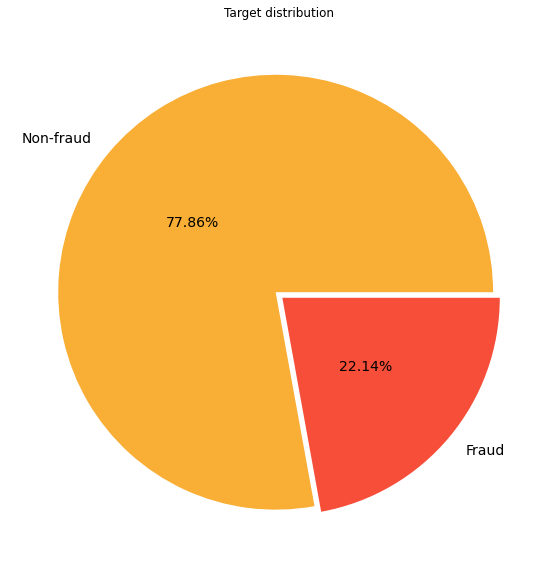

In [9]:
# 타겟 분포도 조사
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

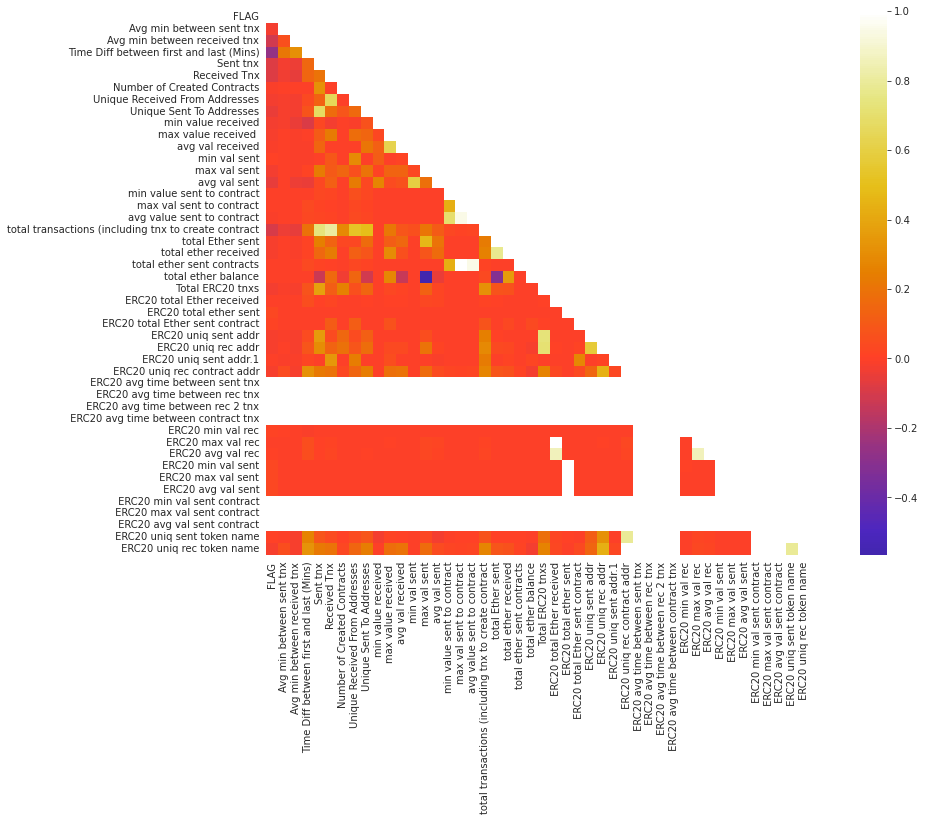

In [10]:
# 모든 컬럼 관계 매트릭스
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

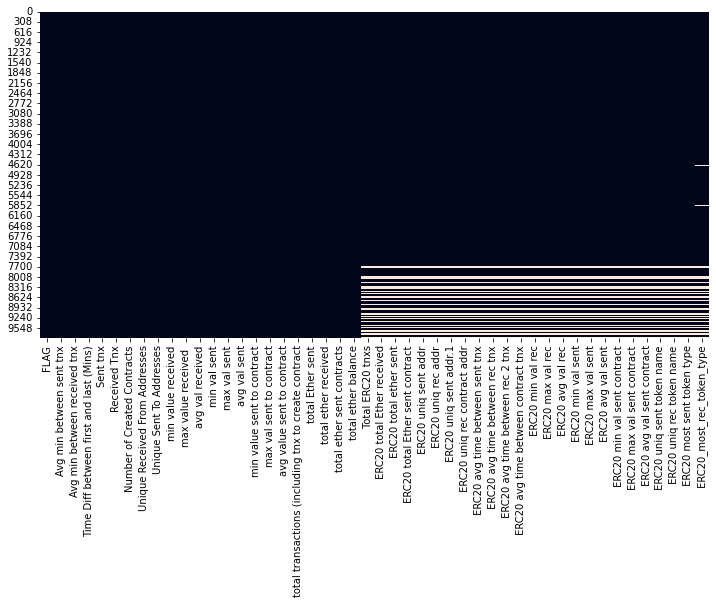

In [11]:
# 데이터 프레임 결측치 시각화
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [12]:
# 결측치가 많고 싱관성이 낮은 범주형 변수 삭제
df.drop(df[categories], axis=1, inplace=True)

In [13]:
# 수치형 변수의 결측치를 중간값으로 채움
df.fillna(df.median(), inplace=True)

(9841, 46)


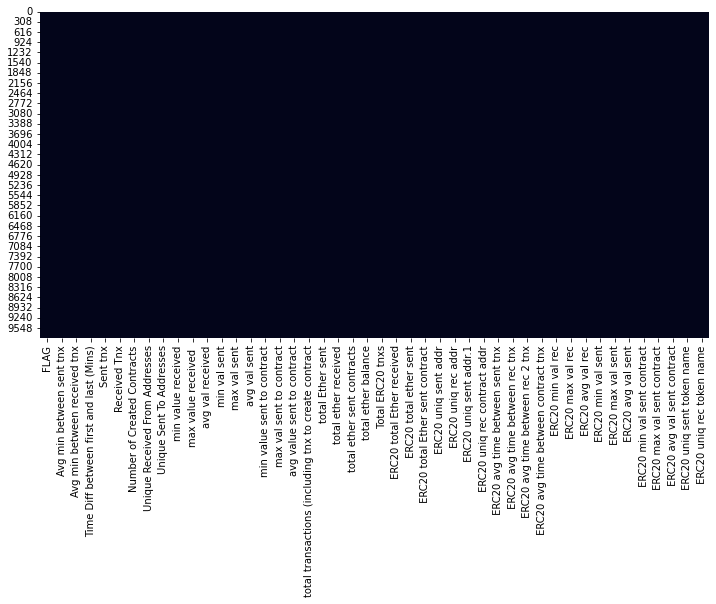

In [14]:
# 결측치 채워졌는지 재확인
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [15]:
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0


In [16]:
# 분산이 0안 값들을 걸러준다.
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# 분산이 0인 애들을 삭제시켜준다 - 분산이 0인 특성들은 모델학습에 도움이 되지않음
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

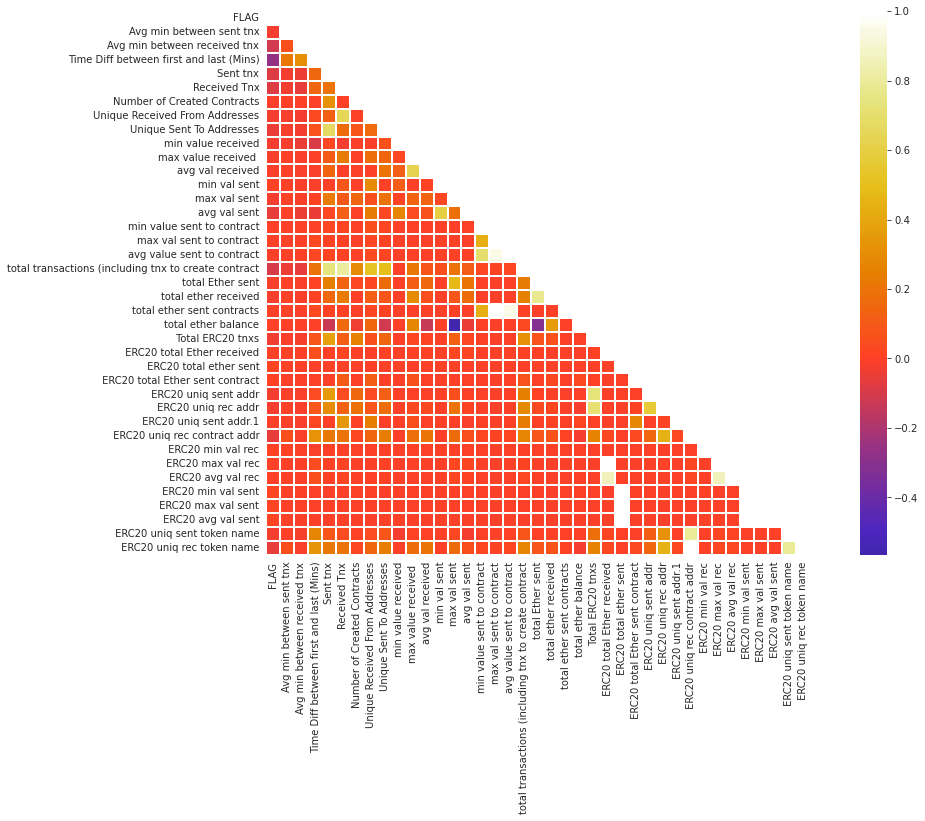

In [18]:
# 상관성을 정리후 다시 확인
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [19]:
df.corr()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,...,-0.011148,-0.052473,0.004434,-0.005510,0.003132,0.019023,0.018770,0.018835,-0.026290,-0.052603
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,...,-0.011862,0.047946,0.004998,-0.002260,-0.002829,-0.001511,-0.001841,-0.001792,0.003310,0.049548
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,...,-0.013750,-0.011693,-0.007794,-0.003326,-0.005241,-0.003545,-0.003568,-0.003521,-0.016831,-0.011684
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,...,0.022216,0.324088,-0.008921,0.046278,0.049160,-0.006174,-0.005606,-0.006148,0.269025,0.329237
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,...,-0.007671,0.221971,-0.003480,0.004445,0.009104,-0.001407,-0.000870,-0.001271,0.082239,0.222945
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,...,0.337827,0.204128,-0.004043,0.015522,0.019382,-0.001735,-0.000584,-0.000763,0.045475,0.205219
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,...,-0.000967,0.029421,-0.000724,0.000946,0.002096,-0.000067,0.000173,-0.000046,0.006475,0.030527
Unique Received From Addresses,-0.031941,-0.015912,-0.029571,0.037043,0.130064,0.648655,-0.002211,1.000000,0.159829,-0.012939,...,0.241752,0.149037,-0.001784,0.001691,0.003741,-0.000961,-0.000178,-0.000467,0.042108,0.150158
Unique Sent To Addresses,-0.045584,-0.017688,-0.025747,0.071140,0.670014,0.164112,0.084598,0.159829,1.000000,0.070145,...,-0.004908,0.238617,-0.002093,0.003696,0.005412,-0.000875,-0.000348,-0.000738,0.086414,0.238798
min value received,-0.021641,-0.014886,-0.045753,-0.084996,0.024015,-0.022936,-0.001542,-0.012939,0.070145,1.000000,...,-0.006740,-0.000881,-0.000847,-0.001528,-0.002610,-0.001366,-0.001397,-0.001350,-0.026315,-0.000335


In [20]:
pd.set_option('display.max_columns',None)

In [21]:
# 상관계수 낮은애들 컬럼 삭제
drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

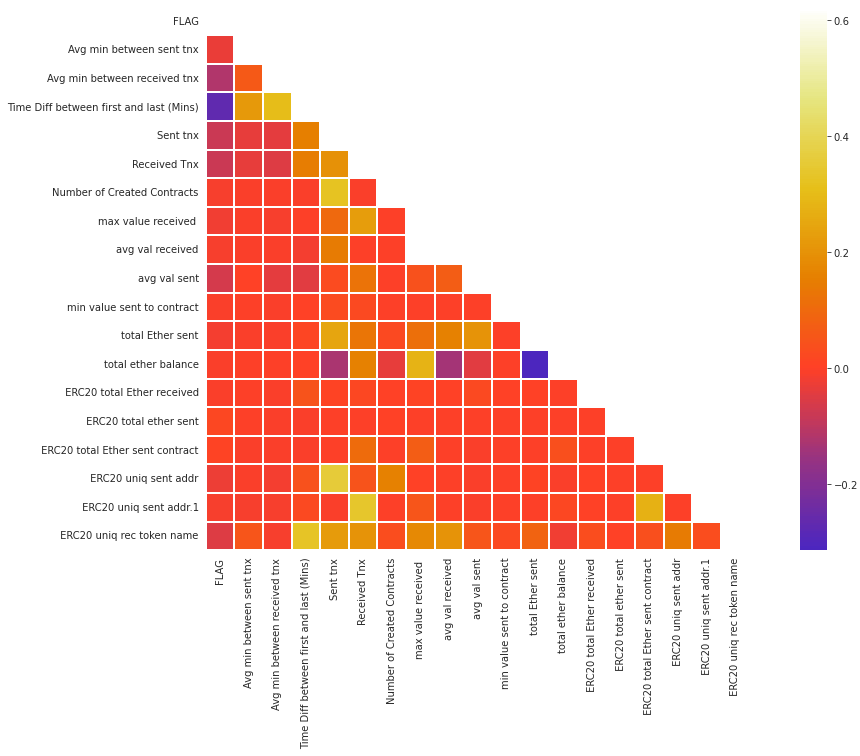

In [22]:
# 다시확인
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [23]:
df.corr()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,min value sent to contract,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.019259,-0.011881,-0.063556,-0.007213,-0.014993,-0.003229,-0.005711,0.018428,0.008127,-0.025746,-0.011148,-0.052603
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.007104,-0.004382,0.003597,-0.000210,-0.006440,-0.001425,-0.002339,-0.001916,-0.004101,-0.008615,-0.011862,0.049548
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.011575,-0.009313,-0.040011,-0.003916,-0.009442,-0.002149,-0.003430,-0.003653,-0.005813,-0.013811,-0.013750,-0.011684
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,-0.002240,-0.014002,-0.046039,0.001734,0.012999,0.002955,0.046570,-0.004338,-0.007337,0.042630,0.022216,0.329237
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.102109,0.140677,0.027468,0.029529,0.244434,-0.127211,0.006840,-0.000158,-0.002652,0.356360,-0.007671,0.222945
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.224805,-0.001786,0.125075,0.020645,0.132150,0.158146,0.016648,-0.000283,0.104939,0.044870,0.337827,0.205219
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.000752,-0.000498,-0.001083,-0.000261,0.024877,-0.037902,0.002099,0.001192,-0.000334,0.154883,-0.000967,0.030527
max value received,-0.019259,-0.007104,-0.011575,-0.002240,0.102109,0.224805,-0.000752,1.000000,0.622959,0.043989,-0.000427,0.112739,0.278315,0.006272,-0.000225,0.068761,0.001661,0.048862,0.179424
avg val received,-0.011881,-0.004382,-0.009313,-0.014002,0.140677,-0.001786,-0.000498,0.622959,1.000000,0.070700,-0.000457,0.155433,-0.135682,0.004508,-0.000357,-0.000278,0.000019,-0.001589,0.200341
avg val sent,-0.063556,0.003597,-0.040011,-0.046039,0.027468,0.125075,-0.001083,0.043989,0.070700,1.000000,-0.002445,0.198750,-0.045534,0.019435,-0.001420,-0.003243,-0.005914,-0.009380,0.048804


In [24]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

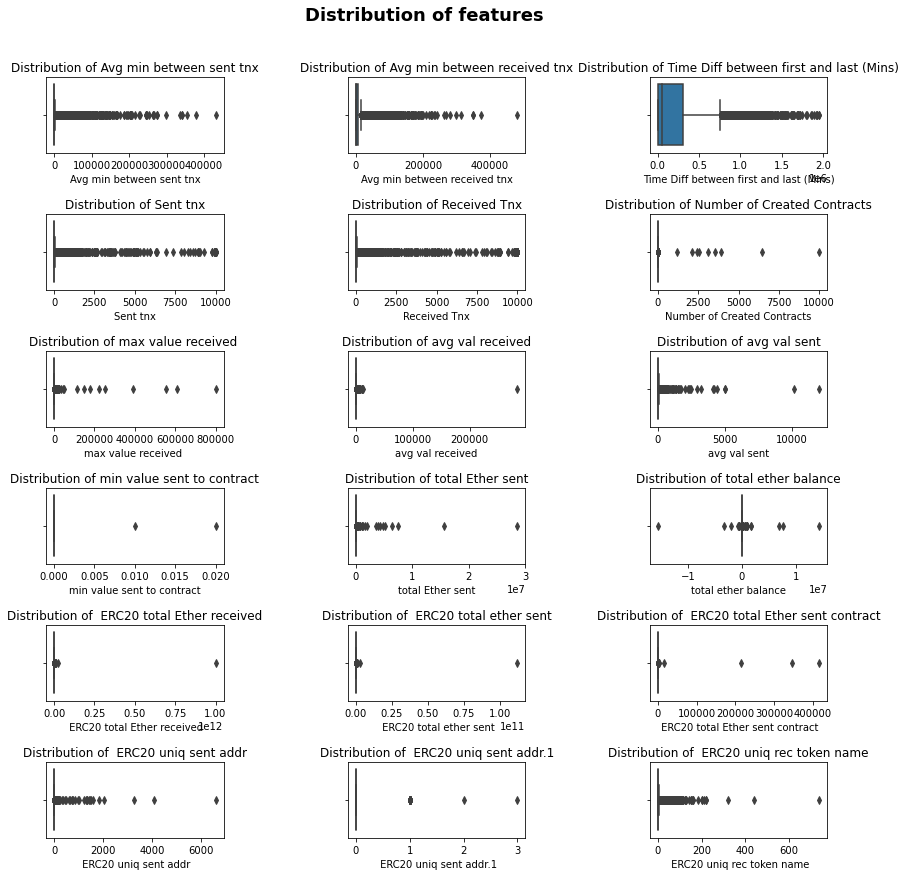

In [25]:
# 박스그래프로  분산 조사
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

plt.show()

In [26]:
# 일정 컬럼들은 분산이 적다. 대부분 0에 치중
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64


In [27]:
# 분산이 0에 가까운 컬럼도 삭제
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


In [28]:
# ERC20 관련 컬럼 삭제
drops = [' ERC20 uniq rec token name', ' ERC20 uniq sent addr', ' ERC20 total Ether sent contract',' ERC20 total ether sent',' ERC20 total Ether received']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 12)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986


In [29]:
drops = ['Avg min between sent tnx','Avg min between received tnx','Time Diff between first and last (Mins)']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 9)


,FLAG,Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance
0,0,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419
1,0,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819
2,0,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441
3,0,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303
4,0,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986


In [30]:
drops = ['Number of Created Contracts']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 8)


,FLAG,Sent tnx,Received Tnx,max value received,avg val received,avg val sent,total Ether sent,total ether balance
0,0,721,89,45.806785,6.589513,1.200681,865.691093,-279.224419
1,0,94,8,2.613269,0.385685,0.032844,3.087297,-0.001819
2,0,2,10,1.165453,0.358906,1.794308,3.588616,0.000441
3,0,25,9,500.000000,99.488840,70.001834,1750.045862,-854.646303
4,0,4598,20,12.802411,2.671095,0.022688,104.318883,-50.896986


In [31]:
cols= ['Sent tnx'+'Received Tnx']
df['total tnx'] = df['Sent tnx']+df['Received Tnx']
df

,FLAG,Sent tnx,Received Tnx,max value received,avg val received,avg val sent,total Ether sent,total ether balance,total tnx
0,0,721,89,45.806785,6.589513,1.200681,865.691093,-279.224419,810
1,0,94,8,2.613269,0.385685,0.032844,3.087297,-0.001819,102
2,0,2,10,1.165453,0.358906,1.794308,3.588616,0.000441,12
3,0,25,9,500.000000,99.488840,70.001834,1750.045862,-854.646303,34
4,0,4598,20,12.802411,2.671095,0.022688,104.318883,-50.896986,4618
...,...,...,...,...,...,...,...,...,...
9836,1,4,13,12.000000,2.821060,9.166365,36.665461,0.008316,17
9837,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
9838,1,67,43,21.310000,1.234192,0.922179,61.785995,-8.715743,110
9839,1,0,1,0.500000,0.500000,0.000000,0.000000,0.500000,1


In [32]:
drops = ['Sent tnx','Received Tnx']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 7)


,FLAG,max value received,avg val received,avg val sent,total Ether sent,total ether balance,total tnx
0,0,45.806785,6.589513,1.200681,865.691093,-279.224419,810
1,0,2.613269,0.385685,0.032844,3.087297,-0.001819,102
2,0,1.165453,0.358906,1.794308,3.588616,0.000441,12
3,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,34
4,0,12.802411,2.671095,0.022688,104.318883,-50.896986,4618


In [33]:
df['avg total val'] = df['avg val received']+df['avg val sent']
df

,FLAG,max value received,avg val received,avg val sent,total Ether sent,total ether balance,total tnx,avg total val
0,0,45.806785,6.589513,1.200681,865.691093,-279.224419,810,7.790194
1,0,2.613269,0.385685,0.032844,3.087297,-0.001819,102,0.418529
2,0,1.165453,0.358906,1.794308,3.588616,0.000441,12,2.153214
3,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,34,169.490674
4,0,12.802411,2.671095,0.022688,104.318883,-50.896986,4618,2.693783
...,...,...,...,...,...,...,...,...
9836,1,12.000000,2.821060,9.166365,36.665461,0.008316,17,11.987425
9837,1,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
9838,1,21.310000,1.234192,0.922179,61.785995,-8.715743,110,2.156371
9839,1,0.500000,0.500000,0.000000,0.000000,0.500000,1,0.500000


In [34]:
drops = ['avg val received','avg val sent']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 6)


,FLAG,max value received,total Ether sent,total ether balance,total tnx,avg total val
0,0,45.806785,865.691093,-279.224419,810,7.790194
1,0,2.613269,3.087297,-0.001819,102,0.418529
2,0,1.165453,3.588616,0.000441,12,2.153214
3,0,500.000000,1750.045862,-854.646303,34,169.490674
4,0,12.802411,104.318883,-50.896986,4618,2.693783


In [ ]:
drops = ['total Ether sent']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

- total tnx : 지갑의 총 거래수
- avg total val : 지금까지 거래한 이더의 평균가치
- max value received : 지금까지 받은 이더의 최대가치
- total Ether sent : 총 보낸 이더리움
- total ether balance : 거래에 따른 지갑에 있는 총 이더리움 잔액

In [35]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 5) (9841,)


In [36]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 5) (7872,)
(1969, 5) (1969,)


In [ ]:
# 학습할 특징들을  표준화
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [ ]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

In [ ]:
# 표준화 이후 박스그래프로 분산 확인

#b=20

#fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
#plt.subplots_adjust(wspace = 0.7, hspace=0.8)
#axes[-1, -1].axis('off') # hide axes
#axes[-1, -2].axis('off') # hide axes
#plt.suptitle("Distribution of features after log",y=0.95, family='Sherif', size=18, weight='bold')
 
#ax = sns.boxplot(ax = axes[0,0], data=norm_df, x=norm_df.columns[0])
#ax.set_title(f'Distribution of {norm_df.columns[0]}')
 
#ax1 = sns.boxplot(ax = axes[0,1], data=norm_df, x=norm_df.columns[1])
#ax1.set_title(f'Distribution of {norm_df.columns[1]}')
 
#ax2 = sns.boxplot(ax = axes[0,2], data=norm_df, x=norm_df.columns[2])
#ax2.set_title(f'Distribution of {norm_df.columns[2]}')
 
#ax3 = sns.boxplot(ax = axes[1,0], data=norm_df, x=norm_df.columns[3])
#ax3.set_title(f'Distribution of {norm_df.columns[3]}')
 
#ax4 = sns.boxplot(ax = axes[1,1], data=norm_df, x=norm_df.columns[4])
#ax4.set_title(f'Distribution of {norm_df.columns[4]}')
 
#ax5 = sns.boxplot(ax = axes[1,2], data=norm_df, x=norm_df.columns[5])
#ax5.set_title(f'Distribution of {norm_df.columns[5]}')
 
#ax6 = sns.boxplot(ax = axes[2,0], data=norm_df, x=norm_df.columns[6])
#ax6.set_title(f'Distribution of {norm_df.columns[6]}')
 
#ax7 = sns.boxplot(ax = axes[2,1], data=norm_df, x=norm_df.columns[7])
#ax7.set_title(f'Distribution of {norm_df.columns[7]}')
 
#ax8 = sns.boxplot(ax = axes[2,2], data=norm_df, x=norm_df.columns[8])
#ax8.set_title(f'Distribution of {norm_df.columns[8]}')
 
#ax9 = sns.boxplot(ax = axes[3,0], data=norm_df, x=norm_df.columns[9])
#ax9.set_title(f'Distribution of {norm_df.columns[9]}')

#ax10 = sns.boxplot(ax = axes[3,1], data=norm_df, x=norm_df.columns[10])
#ax10.set_title(f'Distribution of {norm_df.columns[10]}')
 
#ax11 = sns.boxplot(ax = axes[3,2], data=norm_df, x=norm_df.columns[11])
#ax11.set_title(f'Distribution of {norm_df.columns[11]}')
 
#ax12 = sns.boxplot(ax = axes[4,0], data=norm_df, x=norm_df.columns[12])
#ax12.set_title(f'Distribution of {norm_df.columns[12]}')
 
#ax13 = sns.boxplot(ax = axes[4,1], data=norm_df, x=norm_df.columns[13])
#ax13.set_title(f'Distribution of {norm_df.columns[13]}')
 
#ax14 = sns.boxplot(ax = axes[4,2], data=norm_df, x=norm_df.columns[14])
#ax14.set_title(f'Distribution of {norm_df.columns[14]}')


### 데이터 불균형 잡아주기
 - SMOTE 이용해서 오버샘플링해주기
 - (오버샘플링 - 데이터가 부족한 쪽이 많은 쪽과 맞추기 위해 근접 특성들을 이용해 샘플들을 늘려주는것)

In [37]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {X_train.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(X_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7872, 5), (7872,))
Shape of the training after SMOTE: ((12230, 5), (12230,))


In [38]:
# 정답 데이터 - smote 이전
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# 정답 데이터 - smote 이후
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 6116


## 모델링

- 회귀 모델


In [ ]:
# 회귀 모델 생성 및 학습,예측
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)


preds = LR.predict(X_test)

In [ ]:
print(y_test.shape)
y_test.value_counts()

In [ ]:
# 재현율이 조금 떨어지기 때문에 다른 모델로 시도
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
plot_confusion_matrix(LR, X_test, y_test)

In [ ]:
# 랜덤 포레스트 분류 모델

RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(X_test)

# 랜덤 포레스트 분류 모델이 더욱 효과적인 결과를 도출 정확도,재현율 증가
print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))
plot_confusion_matrix(RF, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1547
           1       0.68      0.81      0.74       422

    accuracy                           0.88      1969
   macro avg       0.81      0.85      0.83      1969
weighted avg       0.89      0.88      0.88      1969

[[1386  161]
 [  82  340]]


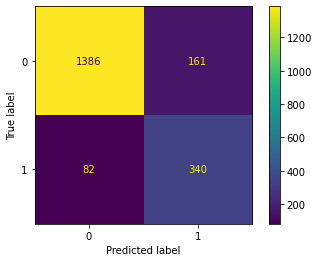

In [39]:
# XGB 분류모델
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(X_test)

# XGB이 모델이 가장 결과가 좋고 더욱 정확한 결과를 위해 하이퍼 파라미터 튜닝 시도
print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))
plot_confusion_matrix(xgb_c, X_test, y_test)

In [ ]:
#params_grid = {'learning_rate':[0.01, 0.1, 0.5],
              #'n_estimators':[100,200],
              #'subsample':[0.3, 0.5, 0.9],
               #'max_depth':[2,3,4],
               #'colsample_bytree':[0.3,0.5,0.7]}

#grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

#grid.fit(x_tr_resample, y_tr_resample)
#print(f'Best params found for XGBoost are: {grid.best_params_}')
#print(f'Best recall obtained by the best params: {grid.best_score_}')

In [ ]:
# 그리드 서치로 최적값을 찾았으나 크게 차이는 없음
#preds_best_xgb = grid.best_estimator_.predict(norm_test_f)
#print(classification_report(y_test, preds_best_xgb))
#print(confusion_matrix(y_test, preds_best_xgb))
#plot_confusion_matrix(grid.best_estimator_, norm_test_f, y_test)

In [ ]:
 #XGB 모델 그래프로!
probs = xgb_c.predict_proba(X_test)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
# 모델 저장!
pickle_out = open('XGB_FRAUD.pickle', 'wb')
pickle.dump(xgb_c, pickle_out)
pickle_out.close()

In [41]:
import os

f_path = './'
f_name = "project_data.csv"

df.to_csv(os.path.join(f_path,f_name),index=False)

In [42]:
df.head()

,FLAG,max value received,total Ether sent,total ether balance,total tnx,avg total val
0,0,45.806785,865.691093,-279.224419,810,7.790194
1,0,2.613269,3.087297,-0.001819,102,0.418529
2,0,1.165453,3.588616,0.000441,12,2.153214
3,0,500.000000,1750.045862,-854.646303,34,169.490674
4,0,12.802411,104.318883,-50.896986,4618,2.693783


In [ ]:
x_tr_resample